In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [2]:
data = pd.read_csv("real_estate.csv")

In [3]:
data.head()

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000.0,158.00,5.0,3.57,12103.0,1956.0,1.0,2208.860759
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063


In [4]:
data.shape

(4942, 11)

## Detecting Outliers

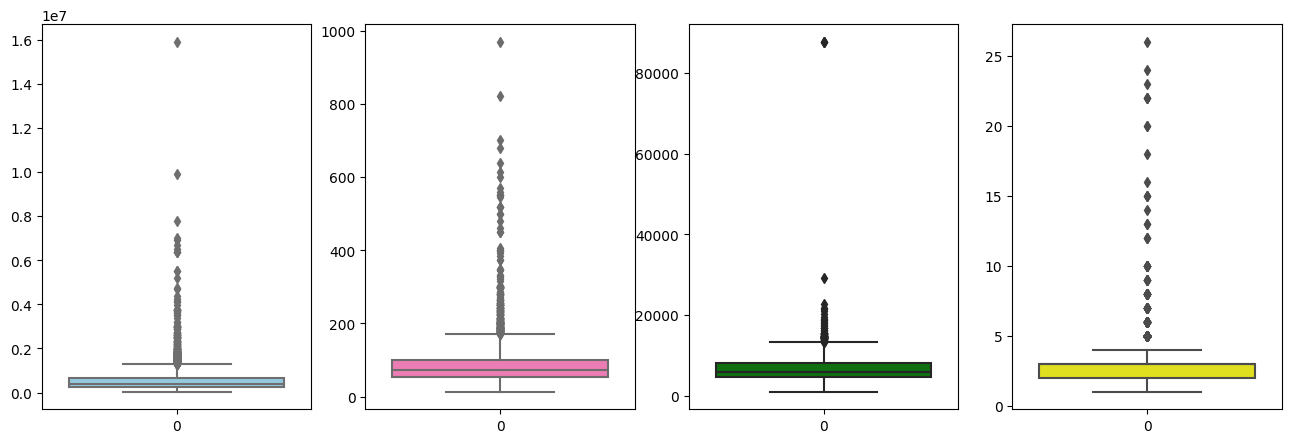

In [5]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['price'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['area'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['price_per_area'],color='green')
plt.subplot(144)
sns.boxplot(data['rooms'],color='yellow')
plt.show()

In [6]:
# Data cleaning - removing outliers based on IQR
Q1_area = data['price'].quantile(0.25)
Q3_area = data['price'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_area = data['price_per_area'].quantile(0.25)
Q3_area = data['price_per_area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = data['area'].quantile(0.25)
Q3_price = data['area'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_area = data['rooms'].quantile(0.25)
Q3_area = data['rooms'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

data_cleaned = data[(data['area'] >= lower_bound_area) & (data['area'] <= upper_bound_area)] 
data_cleaned = data[(data['price'] >= lower_bound_area) & (data['price'] <= upper_bound_area)]
data_cleaned = data[(data['price_per_area'] >= lower_bound_area) & (data['price_per_area'] <= upper_bound_area)] 
data_cleaned = data[(data['rooms'] >= lower_bound_area) & (data['rooms'] <= upper_bound_area)]               

data_cleaned.head()

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000.0,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000.0,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000.0,120.00,4.0,3.57,12161.0,1900.0,5.0,6416.666667
4,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990.0,126.00,4.0,3.57,12157.0,1909.0,3.0,3928.492063
5,https://www.immowelt.de/expose/29e4y5t,na,na,207500.0,34.02,1.0,3.57,10715.0,1898.0,1.0,6099.353322


In [7]:
# Check the cleaned dataset
data_cleaned.describe()

,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
count,4.535000e+03,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,4.850937e+05,75.179200,2.497023,5.437063,11973.932966,1944.450496,3.096141,6300.677741
std,4.240905e+05,40.329074,0.901368,118.692186,1650.413558,146.342408,5.009741,2925.186615
min,3.495000e+04,13.000000,1.000000,-3.500000,1099.000000,1.000000,1.000000,956.521739
25%,2.500000e+05,52.695000,2.000000,3.570000,10589.000000,1910.000000,1.000000,4525.773196
50%,3.690000e+05,68.860000,3.000000,3.570000,12163.000000,1956.000000,1.000000,5750.000000
75%,5.800000e+05,92.000000,3.000000,3.570000,13088.000000,1993.000000,3.000000,7883.097166
max,7.796000e+06,970.000000,4.000000,7996.000000,77933.000000,2026.000000,24.000000,87739.070663


In [8]:
y = data_cleaned.iloc[:, 3].values
x = data_cleaned.drop('price', axis=1)

In [9]:
x.head(2)

,url,energy,heating,area,rooms,fee,zipcode,construction_year,level,price_per_area
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,64.00,3.0,3.57,13505.0,1971.0,2.0,3890.625000
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768


In [10]:
x = x.iloc[:, :].values

In [11]:
x

array([['https://www.immowelt.de/expose/29fhx5b', 'Öl', 'Zentralheizung',
        ..., 1971.0, 2.0, 3890.625],
       ['https://www.immowelt.de/expose/29hzk5u', 'Gas',
        'Fußbodenheizung, offener ', ..., 1900.0, 5.0, 9517.859767749522],
       ['https://www.immowelt.de/expose/292m95u', 'Gas', 'Etagenheizung',
        ..., 1900.0, 5.0, 6416.666666666667],
       ...,
       ['https://www.immowelt.de/expose/2f79g4a', 'Gas', 'Etagenheizung',
        ..., 1900.0, 1.0, 7400.0],
       ['https://www.immowelt.de/expose/2ej2m4d', 'Fernwärme',
        'Minergie zertifiziert', ..., 1894.0, 1.0, 7843.467289719626],
       ['https://www.immowelt.de/expose/263a44g', 'Öl', 'Zentralheizung',
        ..., 1986.0, 2.0, 1759.1556053094514]], dtype=object)

In [12]:
y

array([ 249000., 1295000.,  770000., ...,  695600.,  839251.,  220000.])

In [13]:
data.shape

(4942, 11)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4942 entries, 0 to 4941
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                4942 non-null   object 
 1   energy             4942 non-null   object 
 2   heating            4942 non-null   object 
 3   price              4942 non-null   float64
 4   area               4942 non-null   float64
 5   rooms              4942 non-null   float64
 6   fee                4942 non-null   float64
 7   zipcode            4942 non-null   float64
 8   construction_year  4942 non-null   float64
 9   level              4942 non-null   float64
 10  price_per_area     4942 non-null   float64
dtypes: float64(8), object(3)
memory usage: 424.8+ KB


In [15]:
data.describe()

,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
count,4.942000e+03,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000
mean,5.654009e+05,85.067321,2.805544,5.891574,11954.461554,1944.344193,3.401255,6401.269284
std,6.107572e+05,58.315922,1.582906,121.004862,1628.058346,143.609751,29.137154,3183.956274
min,3.495000e+04,13.000000,1.000000,-3.500000,1099.000000,1.000000,1.000000,956.521739
25%,2.590000e+05,54.070000,2.000000,3.570000,10589.000000,1910.000000,1.000000,4537.537879
50%,3.899000e+05,72.740000,3.000000,3.570000,12161.000000,1956.000000,1.000000,5843.852267
75%,6.690000e+05,101.000000,3.000000,3.570000,13088.000000,1994.000000,3.000000,8063.468346
max,1.590000e+07,970.000000,26.000000,7996.000000,77933.000000,2026.000000,2023.000000,87739.070663


In [16]:
data_cleaned.shape

(4535, 11)

Insight. 407 rows after data cleaning have droped

Missing values

In [17]:
data_cleaned.isna().sum()

url                  0
energy               0
heating              0
price                0
area                 0
rooms                0
fee                  0
zipcode              0
construction_year    0
level                0
price_per_area       0
dtype: int64

In [18]:
test3 = data_cleaned.isna().sum() / len(data_cleaned)

In [19]:
Drop = list(test3[test3 > 0.5].index)

In [20]:
Drop

[]

Althogh there are nan values in categorical columns "energy" & "heating".

In [21]:
dd=data_cleaned['price'].value_counts()

In [22]:
dd

price
399000.0    74
299000.0    61
249000.0    47
449000.0    46
349000.0    44
            ..
229725.0     1
282900.0     1
422475.0     1
208164.0     1
839251.0     1
Name: count, Length: 1307, dtype: int64

## EDA

In [23]:
# define numerical & categorical columns
numeric_features = [feature for feature in data_cleaned.columns if data_cleaned[feature].dtype != 'O']
categorical_features = [feature for feature in data_cleaned.columns if data_cleaned[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['price', 'area', 'rooms', 'fee', 'zipcode', 'construction_year', 'level', 'price_per_area']

We have 3 categorical features : ['url', 'energy', 'heating']


In [24]:
print("Categories in 'heating' variable:     ",end=" " )
print(data_cleaned['heating'].unique())

Categories in 'heating' variable:      ['Zentralheizung' 'Fußbodenheizung, offener ' 'Etagenheizung' 'na'
 'Fußbodenheizung, ' 'Fußbodenheizung' 'Kamin, ' 'Heizungsart' 'Wasser-'
 'Kf' 'Luft-/' 'Kamin' 'Wärmepumpe' 'Niedrigenergiehaus' 'Etagenheizung, '
 'Ofen, ' 'Etagenheizung, offener ' 'Wärmepumpe, ' 'Fertighaus'
 'Wärmepumpe, offener ' 'Kohle, ' 'Heizungsartoffener '
 'Minergie zertifiziert']


In [25]:
print(data_cleaned['heating'].value_counts())

heating
na                           1947
Zentralheizung               1718
Etagenheizung                 320
Fußbodenheizung,              191
Fußbodenheizung               158
Heizungsart                    67
Kamin,                         26
Wasser-                        21
Wärmepumpe                     17
Kf                             15
Niedrigenergiehaus             12
Kamin                           8
Fußbodenheizung, offener        7
Etagenheizung,                  6
Etagenheizung, offener          6
Wärmepumpe,                     3
Fertighaus                      3
Heizungsartoffener              3
Luft-/                          2
Minergie zertifiziert           2
Ofen,                           1
Wärmepumpe, offener             1
Kohle,                          1
Name: count, dtype: int64


In [26]:
x[x[:, 2] == 'na', 2] = np.nan
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')   # mode
imputer.fit(x[:, 2:3])
x[:, 2:3] = imputer.transform(x[:, 2:3])

In [27]:
x[:, 2:3]

array([['Zentralheizung'],
       ['Fußbodenheizung, offener '],
       ['Etagenheizung'],
       ...,
       ['Etagenheizung'],
       ['Minergie zertifiziert'],
       ['Zentralheizung']], dtype=object)

In [28]:
print(x[50:90, :]) #it works..

[['https://www.immowelt.de/expose/29c2t5b' 'Öl' 'Fußbodenheizung' 96.0
  4.0 3.57 13439.0 1956.0 1.0 2291.6666666666665]
 ['https://www.immowelt.de/expose/297kr5a' 'na' 'Zentralheizung' 68.0 3.0
  3.57 12159.0 1956.0 1.0 3970.5882352941176]
 ['https://www.immowelt.de/expose/29hgg5a' 'na' 'Zentralheizung' 66.0 3.0
  3.57 10777.0 1956.0 1.0 7075.757575757576]
 ['https://www.immowelt.de/expose/29shf59' 'na' 'Zentralheizung' 90.0 3.0
  3.57 12683.0 1956.0 1.0 5100.0]
 ['https://www.immowelt.de/expose/29xu458' 'Gas' 'Zentralheizung' 76.58
  3.0 3.57 12105.0 1973.0 1.0 5980.673805171063]
 ['https://www.immowelt.de/expose/295l458' 'Gas' 'Zentralheizung' 76.58
  3.0 3.57 12105.0 1973.0 1.0 5850.091407678245]
 ['https://www.immowelt.de/expose/29vz358' 'Gas' 'Zentralheizung' 43.43
  1.0 3.57 12105.0 1973.0 1.0 6332.028551692379]
 ['https://www.immowelt.de/expose/29fz358' 'Gas' 'Zentralheizung' 56.76
  2.0 3.57 12105.0 1994.0 1.0 6078.224101479916]
 ['https://www.immowelt.de/expose/29kuz56' 'Gas'

In [29]:
#energy
print(data_cleaned['energy'].value_counts())

energy
na                           1947
Gas                          1279
Fernwärme                     768
Öl                            391
Fernwärme,                     25
Elektro,                       24
Fußbodenheizung,               21
Luft-/                         21
Elektro                        13
Blockheizkraftwerk,            11
Solar                          11
Gas,                            9
Erdwärme                        5
Flüssiggas                      2
Pellets                         2
Blockheizkraftwerk              2
Holz,                           1
Niedrigenergiehaus              1
Erdwärme,                       1
Fußbodenheizung, offener        1
Name: count, dtype: int64


In [30]:
x[x[:, 1] == 'na', 1] = np.nan
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')   # mode
imputer.fit(x[:, 1:2])
x[:, 1:2] = imputer.transform(x[:, 1:2])

In [31]:
x[:, 1:2]

array([['Öl'],
       ['Gas'],
       ['Gas'],
       ...,
       ['Gas'],
       ['Fernwärme'],
       ['Öl']], dtype=object)

In [32]:
print(x[50:90, :])

[['https://www.immowelt.de/expose/29c2t5b' 'Öl' 'Fußbodenheizung' 96.0
  4.0 3.57 13439.0 1956.0 1.0 2291.6666666666665]
 ['https://www.immowelt.de/expose/297kr5a' 'Gas' 'Zentralheizung' 68.0
  3.0 3.57 12159.0 1956.0 1.0 3970.5882352941176]
 ['https://www.immowelt.de/expose/29hgg5a' 'Gas' 'Zentralheizung' 66.0
  3.0 3.57 10777.0 1956.0 1.0 7075.757575757576]
 ['https://www.immowelt.de/expose/29shf59' 'Gas' 'Zentralheizung' 90.0
  3.0 3.57 12683.0 1956.0 1.0 5100.0]
 ['https://www.immowelt.de/expose/29xu458' 'Gas' 'Zentralheizung' 76.58
  3.0 3.57 12105.0 1973.0 1.0 5980.673805171063]
 ['https://www.immowelt.de/expose/295l458' 'Gas' 'Zentralheizung' 76.58
  3.0 3.57 12105.0 1973.0 1.0 5850.091407678245]
 ['https://www.immowelt.de/expose/29vz358' 'Gas' 'Zentralheizung' 43.43
  1.0 3.57 12105.0 1973.0 1.0 6332.028551692379]
 ['https://www.immowelt.de/expose/29fz358' 'Gas' 'Zentralheizung' 56.76
  2.0 3.57 12105.0 1994.0 1.0 6078.224101479916]
 ['https://www.immowelt.de/expose/29kuz56' 'G

In [33]:
x = pd.DataFrame(x)

In [34]:
x

,0,1,2,3,4,5,6,7,8,9
0,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,64.0,3.0,3.57,13505.0,1971.0,2.0,3890.625
1,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,120.0,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,126.0,4.0,3.57,12157.0,1909.0,3.0,3928.492063
4,https://www.immowelt.de/expose/29e4y5t,Gas,Zentralheizung,34.02,1.0,3.57,10715.0,1898.0,1.0,6099.353322
...,...,...,...,...,...,...,...,...,...,...
4530,https://www.immowelt.de/expose/2gd5v4m,Fernwärme,"Fußbodenheizung,",78.0,3.0,3.57,13595.0,2000.0,1.0,5500.0
4531,https://www.immowelt.de/expose/2ga5t4m,Gas,Zentralheizung,150.0,4.0,3.57,13467.0,1990.0,1.0,4860.0
4532,https://www.immowelt.de/expose/2f79g4a,Gas,Etagenheizung,94.0,3.0,3.57,10115.0,1900.0,1.0,7400.0
4533,https://www.immowelt.de/expose/2ej2m4d,Fernwärme,Minergie zertifiziert,107.0,3.0,3.57,13591.0,1894.0,1.0,7843.46729


In [35]:
subset = x.iloc[19:50]
subset

,0,1,2,3,4,5,6,7,8,9
19,https://www.immowelt.de/expose/29hxu5m,Gas,Zentralheizung,60.73,2.0,3.57,13357.0,1995.0,1.0,5596.904331
20,https://www.immowelt.de/expose/2965l5m,Gas,Zentralheizung,65.0,2.0,3.57,10405.0,1956.0,1.0,13692.307692
21,https://www.immowelt.de/expose/29ktj5m,Gas,Zentralheizung,90.0,3.0,3.57,13359.0,1956.0,1.0,4887.777778
22,https://www.immowelt.de/expose/298cf5m,Fernwärme,Zentralheizung,103.35,3.0,3.57,10245.0,1901.0,3.0,6724.721819
23,https://www.immowelt.de/expose/29k9n5l,Gas,Zentralheizung,113.85,3.0,3.57,12205.0,2017.0,2.0,7369.34563
24,https://www.immowelt.de/expose/29mvr5k,Gas,Zentralheizung,71.0,2.0,3.57,13158.0,1956.0,1.0,3366.197183
25,https://www.immowelt.de/expose/29znq5k,Gas,Zentralheizung,84.0,3.0,3.57,10249.0,1956.0,1.0,7678.571429
26,https://www.immowelt.de/expose/29dzg5k,Gas,Zentralheizung,63.02,2.0,3.57,13086.0,1956.0,2.0,7442.081879
27,https://www.immowelt.de/expose/29qyg5k,Gas,Zentralheizung,74.39,3.0,3.57,13086.0,1956.0,1.0,6842.317516
28,https://www.immowelt.de/expose/29ard5k,Gas,Zentralheizung,122.0,3.0,3.57,14167.0,1956.0,1.0,5163.934426


In [36]:
x.iloc[:, 1].unique()

array(['Öl', 'Gas', 'Fernwärme', 'Fernwärme, ', 'Elektro', 'Elektro, ',
       'Gas, ', 'Fußbodenheizung, ', 'Flüssiggas', 'Luft-/',
       'Blockheizkraftwerk, ', 'Holz, ', 'Erdwärme', 'Solar',
       'Niedrigenergiehaus', 'Pellets', 'Blockheizkraftwerk',
       'Erdwärme, ', 'Fußbodenheizung, offener '], dtype=object)

In [37]:
mapping = {
    'Gas': 1,
    'Gas, ': 1,
    'Fernwärme': 2,
    'Fernwärme, ': 2,
    'Öl': 3,
    'Elektro': 4,
    'Elektro, ': 4,
    'Fußbodenheizung, ': 4,
    'Flüssiggas': 4,
    'Luft-/': 4,
    'Blockheizkraftwerk, ': 4,
    'Holz, ': 4,
    'Erdwärme': 4,
    'Solar': 4,
    'Niedrigenergiehaus': 4,
    'Pellets': 4,
    'Blockheizkraftwerk': 4,
    'Erdwärme, ': 4,
    'Fußbodenheizung, offener ': 4,
    
}
# Print unique values before replacement
print("Unique values before replacement:", x.iloc[:, 1].unique())

# Replace the values in the energy column
x.iloc[:, 1] = x.iloc[:, 1].replace(mapping)

# Check unique values after replacement
print("Unique values after replacement:", x.iloc[:, 1].unique())

# Display the updated DataFrame
print(x.iloc[:, 1]) 

Unique values before replacement: ['Öl' 'Gas' 'Fernwärme' 'Fernwärme, ' 'Elektro' 'Elektro, ' 'Gas, '
 'Fußbodenheizung, ' 'Flüssiggas' 'Luft-/' 'Blockheizkraftwerk, ' 'Holz, '
 'Erdwärme' 'Solar' 'Niedrigenergiehaus' 'Pellets' 'Blockheizkraftwerk'
 'Erdwärme, ' 'Fußbodenheizung, offener ']
Unique values after replacement: [3 1 2 4]
0       3
1       1
2       1
3       1
4       1
       ..
4530    2
4531    1
4532    1
4533    2
4534    3
Name: 1, Length: 4535, dtype: object


In [38]:
print(x.iloc[:, 1].head()) 

0    3
1    1
2    1
3    1
4    1
Name: 1, dtype: object


In [39]:
x.iloc[:, 2] = x.iloc[:, 2].str.replace(',', '', regex=False)

In [40]:
x.iloc[:, 2].unique()

array(['Zentralheizung', 'Fußbodenheizung offener ', 'Etagenheizung',
       'Fußbodenheizung ', 'Fußbodenheizung', 'Kamin ', 'Heizungsart',
       'Wasser-', 'Kf', 'Luft-/', 'Kamin', 'Wärmepumpe',
       'Niedrigenergiehaus', 'Etagenheizung ', 'Ofen ',
       'Etagenheizung offener ', 'Wärmepumpe ', 'Fertighaus',
       'Wärmepumpe offener ', 'Kohle ', 'Heizungsartoffener ',
       'Minergie zertifiziert'], dtype=object)

In [41]:
mapping = {
    'Zentralheizung': 1,
    'Etagenheizung': 2,
    'Fußbodenheizung ': 3,
    'Fußbodenheizung': 3,
    'Heizungsart': 4,
    'Kamin ': 4,
    'Wärmepumpe': 4,
    'Wasser-': 4,
    'Kf': 4,
    'Kamin': 4,
    'Niedrigenergiehaus': 4,
    'Fußbodenheizung offener ': 4,
    'Etagenheizung offener ': 4,
    'Etagenheizung ': 4,
    'Heizungsartoffener ': 4,
    'Luft-/': 4,
    'Wärmepumpe ': 4,
    'Fertighaus': 4,
    'Minergie zertifiziert': 4,
    'Ofen ': 4,
    'Wärmepumpe offener ': 4,
    'Kohle ': 4,
}
# Print unique values before replacement
print("Unique values before replacement:", x.iloc[:, 2].unique())

# Replace the values in the heating column
x.iloc[:, 2] = x.iloc[:, 2].replace(mapping)

# Check unique values after replacement
print("Unique values after replacement:", x.iloc[:, 2].unique())

# Display the updated DataFrame
print(x.iloc[:, 2]) 

Unique values before replacement: ['Zentralheizung' 'Fußbodenheizung offener ' 'Etagenheizung'
 'Fußbodenheizung ' 'Fußbodenheizung' 'Kamin ' 'Heizungsart' 'Wasser-'
 'Kf' 'Luft-/' 'Kamin' 'Wärmepumpe' 'Niedrigenergiehaus' 'Etagenheizung '
 'Ofen ' 'Etagenheizung offener ' 'Wärmepumpe ' 'Fertighaus'
 'Wärmepumpe offener ' 'Kohle ' 'Heizungsartoffener '
 'Minergie zertifiziert']
Unique values after replacement: [1 4 2 3]
0       1
1       4
2       2
3       2
4       1
       ..
4530    3
4531    1
4532    2
4533    4
4534    1
Name: 2, Length: 4535, dtype: object


In [42]:
print(x.iloc[:, 2].tail()) 

4530    3
4531    1
4532    2
4533    4
4534    1
Name: 2, dtype: object


In [43]:
x

,0,1,2,3,4,5,6,7,8,9
0,https://www.immowelt.de/expose/29fhx5b,3,1,64.0,3.0,3.57,13505.0,1971.0,2.0,3890.625
1,https://www.immowelt.de/expose/29hzk5u,1,4,136.06,4.0,3.57,10405.0,1900.0,5.0,9517.859768
2,https://www.immowelt.de/expose/292m95u,1,2,120.0,4.0,3.57,12161.0,1900.0,5.0,6416.666667
3,https://www.immowelt.de/expose/29r5y5t,1,2,126.0,4.0,3.57,12157.0,1909.0,3.0,3928.492063
4,https://www.immowelt.de/expose/29e4y5t,1,1,34.02,1.0,3.57,10715.0,1898.0,1.0,6099.353322
...,...,...,...,...,...,...,...,...,...,...
4530,https://www.immowelt.de/expose/2gd5v4m,2,3,78.0,3.0,3.57,13595.0,2000.0,1.0,5500.0
4531,https://www.immowelt.de/expose/2ga5t4m,1,1,150.0,4.0,3.57,13467.0,1990.0,1.0,4860.0
4532,https://www.immowelt.de/expose/2f79g4a,1,2,94.0,3.0,3.57,10115.0,1900.0,1.0,7400.0
4533,https://www.immowelt.de/expose/2ej2m4d,2,4,107.0,3.0,3.57,13591.0,1894.0,1.0,7843.46729


## Price w.r.t. heating

Text(0, 0.5, 'price')

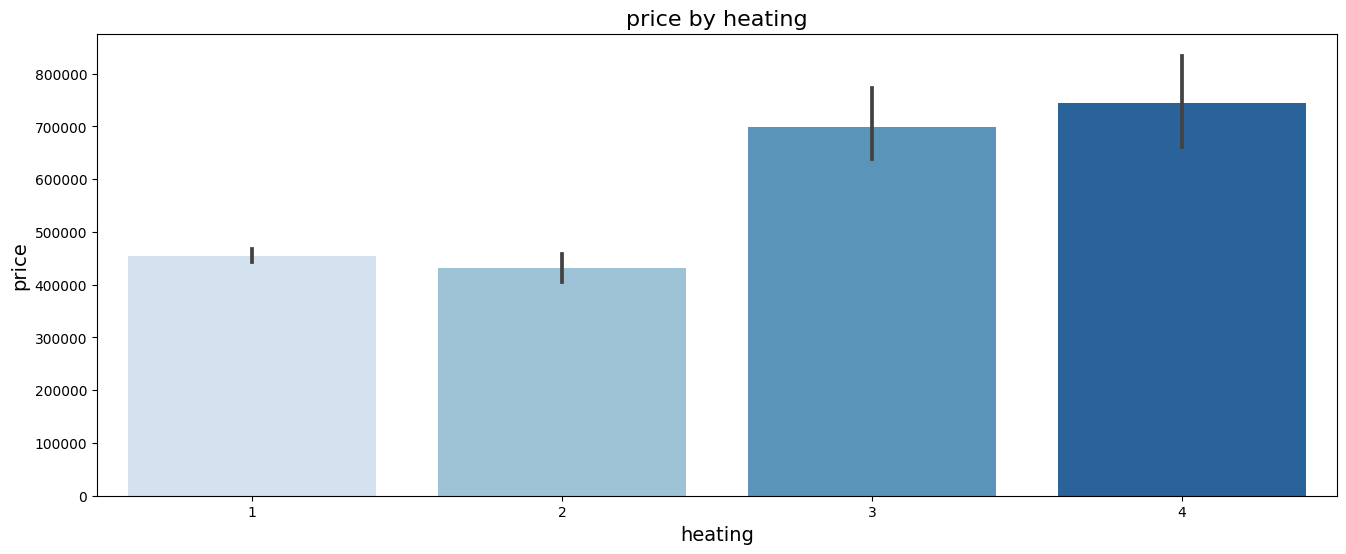

In [44]:
categorical_col = x.iloc[:, 2]  # First column (categorical)
numerical_col = y     # Second column (numerical)

# Create a new DataFrame combining both features for easier plotting
df_plot = pd.DataFrame({
    'categorical_feature': categorical_col,
    'numerical_feature': numerical_col
})

# Create a bar chart using seaborn
plt.figure(figsize=(16, 6))
sns.barplot(x='categorical_feature', y='numerical_feature', data=df_plot, estimator='mean', palette='Blues')

# Add title and labels
plt.title('price by heating', fontsize=16)
plt.xlabel('heating', fontsize=14)
plt.ylabel('price', fontsize=14)

## Price w.r.t energy

Text(0, 0.5, 'price')

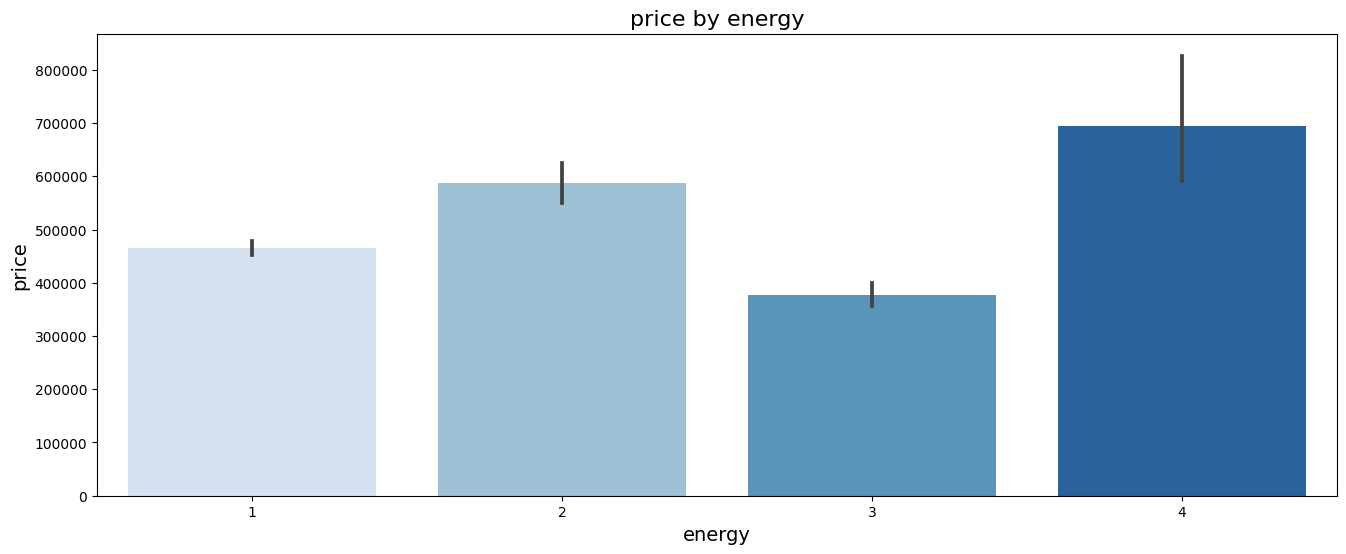

In [45]:
categorical_col = x.iloc[:, 1]  # First column (categorical)
numerical_col = y     # Second column (numerical)

# Create a new DataFrame combining both features for easier plotting
df_plot = pd.DataFrame({
    'categorical_feature': categorical_col,
    'numerical_feature': numerical_col
})

# Create a bar chart using seaborn
plt.figure(figsize=(16, 6))
sns.barplot(x='categorical_feature', y='numerical_feature', data=df_plot, estimator='mean', palette='Blues')

# Add title and labels
plt.title('price by energy', fontsize=16)
plt.xlabel('energy', fontsize=14)
plt.ylabel('price', fontsize=14)

Insight: In the feature energy, Fernwärme has more important impact than Öl on price.

## CC: Correlation Coefficient

In [46]:
Data = data_cleaned.drop(
    columns=[
        "url",
        "energy",
        "heating",
    ]
) 

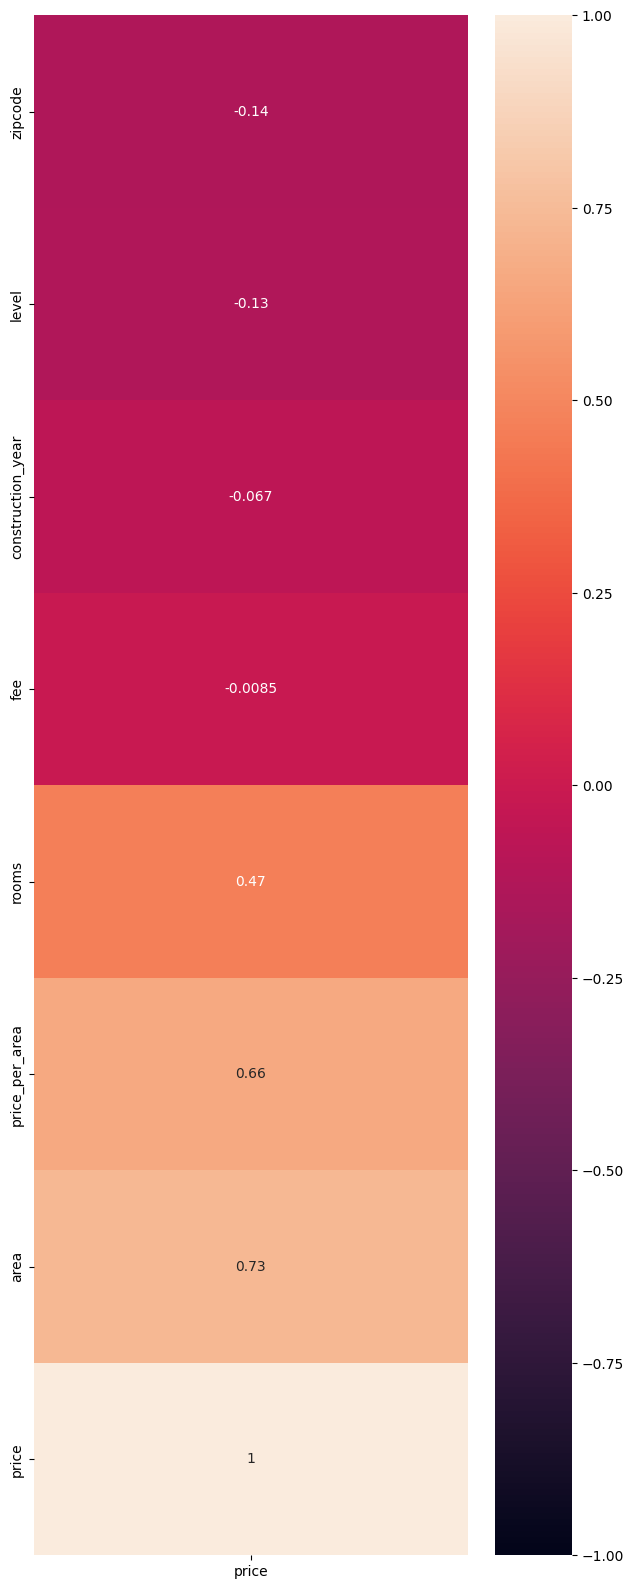

In [47]:
PriceCor = Data.corr()[["price"]].sort_values("price")
plt.figure(figsize=(7, 20))
sns.heatmap(
    PriceCor,
    vmin=-1,
    annot=True,
)
plt.show() 

In [48]:
PriceCor

,price
zipcode,-0.140613
level,-0.131331
construction_year,-0.067111
fee,-0.008535
rooms,0.466880
price_per_area,0.659657
area,0.729959
price,1.000000


In [49]:
df1 = data_cleaned[PriceCor.index]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4535 entries, 0 to 4941
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zipcode            4535 non-null   float64
 1   level              4535 non-null   float64
 2   construction_year  4535 non-null   float64
 3   fee                4535 non-null   float64
 4   rooms              4535 non-null   float64
 5   price_per_area     4535 non-null   float64
 6   area               4535 non-null   float64
 7   price              4535 non-null   float64
dtypes: float64(8)
memory usage: 318.9 KB


In [50]:
df = pd.DataFrame(Data)
correlation_matrix=df.corr()
n=4
most_correlated_features=correlation_matrix.nlargest(n, 'price')['price'].index
#create a new data frame
selected_features=df[most_correlated_features]
selected_features
#Generate heat map
# heatmap=sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
# plt.show()

,price,area,price_per_area,rooms
0,249000.0,64.00,3890.625000,3.0
1,1295000.0,136.06,9517.859768,4.0
2,770000.0,120.00,6416.666667,4.0
4,494990.0,126.00,3928.492063,4.0
5,207500.0,34.02,6099.353322,1.0
...,...,...,...,...
4937,429000.0,78.00,5500.000000,3.0
4938,729000.0,150.00,4860.000000,4.0
4939,695600.0,94.00,7400.000000,3.0
4940,839251.0,107.00,7843.467290,3.0


Approach: Data Reduction-Dimensionality reduction. 11 columns --> 6 

In [51]:
y=data_cleaned['price']
y

0        249000.0
1       1295000.0
2        770000.0
4        494990.0
5        207500.0
          ...    
4937     429000.0
4938     729000.0
4939     695600.0
4940     839251.0
4941     220000.0
Name: price, Length: 4535, dtype: float64

In [52]:
x=x.iloc[:, [1,2,3,4,-1]]
x

,1,2,3,4,9
0,3,1,64.0,3.0,3890.625
1,1,4,136.06,4.0,9517.859768
2,1,2,120.0,4.0,6416.666667
3,1,2,126.0,4.0,3928.492063
4,1,1,34.02,1.0,6099.353322
...,...,...,...,...,...
4530,2,3,78.0,3.0,5500.0
4531,1,1,150.0,4.0,4860.0
4532,1,2,94.0,3.0,7400.0
4533,2,4,107.0,3.0,7843.46729


## Convert Categorical features to numerical

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')
X = np.array(ct.fit_transform(x))

In [54]:
X[:, 0:9]

array([[0.0, 0.0, 1.0, ..., 0.0, 0.0, 64.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 136.06],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 120.0],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 94.0],
       [0.0, 1.0, 0.0, ..., 0.0, 1.0, 107.0],
       [0.0, 0.0, 1.0, ..., 0.0, 0.0, 125.06]], dtype=object)

## Splitting the dataset into the Training set and Test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [56]:
print(X_train)

[[1.0 0.0 0.0 ... 47.0 2.0 7851.063829787234]
 [0.0 0.0 0.0 ... 100.68 4.0 8320.00397298371]
 [1.0 0.0 0.0 ... 22.2 1.0 6531.531531531532]
 ...
 [0.0 1.0 0.0 ... 33.26 1.0 3607.9374624173183]
 [0.0 0.0 1.0 ... 65.0 2.0 4292.307692307692]
 [1.0 0.0 0.0 ... 66.81 3.0 3823.7090255949706]]


In [57]:
print(X_test)

[[1.0 0.0 0.0 ... 73.68 2.0 2700.8686210640603]
 [1.0 0.0 0.0 ... 53.52 2.0 3157.6980568011954]
 [0.0 1.0 0.0 ... 57.2 2.0 8374.125874125873]
 ...
 [1.0 0.0 0.0 ... 150.0 4.0 4860.0]
 [1.0 0.0 0.0 ... 49.0 2.0 5693.877551020408]
 [1.0 0.0 0.0 ... 145.96 3.0 13565.36037270485]]


In [58]:
print(y_train)

4853    369000.0
463     837658.0
2246    145000.0
1674    320250.0
1008    998000.0
          ...   
3139    685000.0
2995    329000.0
971     120000.0
4339    279000.0
248     255462.0
Name: price, Length: 3628, dtype: float64


In [187]:
print(y_test)

2026     199000.0
4379     169000.0
3430     479000.0
818      530000.0
1758     395000.0
          ...    
509      399000.0
3244     278250.0
4938     729000.0
2550     279000.0
760     1980000.0
Name: price, Length: 907, dtype: float64


## Feature Scaling

Standardization is not only as a tool for feature scaling, but also for data integration. When we need to integrate different datasets with different format and types, it's necessary to use feature scaling.

In [188]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [189]:
X_train[:, :]

array([[0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., -0.7078639683906425, -0.565167442608332, 0.589366786499522],
       [-1.5838889045307905, -0.4548840449440405, -0.3078141442084366,
        ..., 0.6329421208017348, 1.6684136922315684, 0.7631510511995165],
       [0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., -1.3273123851561222, -1.6819580100282823,
        0.10036205204200865],
       ...,
       [-1.5838889045307905, 2.198362442285829, -0.3078141442084366, ...,
        -1.0510583734857106, -1.6819580100282823, -0.9830910345695295],
       [-1.5838889045307905, -0.4548840449440405, 3.248713611168022, ...,
        -0.25826431106085873, -0.565167442608332, -0.7294706548482],
       [0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., -0.21305456774047488, 0.5516231248116183,
        -0.9031283719695695]], dtype=object)

In [190]:
X_test[:, :]

array([[0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., -0.04145736519294065, -0.565167442608332,
        -1.3192411678303677],
       [0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., -0.5450089814022985, -0.565167442608332,
        -1.1499450034164185],
       [-1.5838889045307905, 2.198362442285829, -0.3078141442084366, ...,
        -0.45309082923709826, -0.565167442608332, 0.7832080561938959],
       ...,
       [0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., 1.864845181885342, 1.6684136922315684, -0.5190898808848672],
       [0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., -0.6579084509095553, -0.565167442608332,
        -0.21006366686505892],
       [0.6313574122146636, -0.4548840449440405, -0.3078141442084366,
        ..., 1.7639350365735462, 0.5516231248116183, 2.707024737937878]],
      dtype=object)

## Model training

In [191]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [192]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 126440.8601
- Mean Absolute Error: 63874.2071
- R2 Score: 0.9040
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 202576.0829
- Mean Absolute Error: 71626.9085
- R2 Score: 0.8239




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.943e+11, tolerance: 6.040e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 126437.2182
- Mean Absolute Error: 63891.2040
- R2 Score: 0.9040
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 202524.3416
- Mean Absolute Error: 71631.4546
- R2 Score: 0.8240


Ridge
Model performance for Training set
- Root Mean Squared Error: 126437.2728
- Mean Absolute Error: 63881.2392
- R2 Score: 0.9040
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 202513.1966
- Mean Absolute Error: 71624.6374
- R2 Score: 0.8240


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 112000.4048
- Mean Absolute Error: 24548.0112
- R2 Score: 0.9247
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 187165.2823
- Mean Absolute Error: 37329.7978
- R2 Score: 0.8497


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: